In [301]:
from qutip import *
import numpy as np
from matplotlib import pyplot as plt
from math import floor, ceil
from random import shuffle

In [302]:
#Z operator 
#sigmaz()

In [303]:
Qobj()

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

In [304]:

n = 8

qub_dict = {}
for i in range(1, n+1):
    u = np.random.uniform(0, 1)
    if u < 0.5:
        qub_dict['q' + str(i)] = basis(2,0)
    else:
        qub_dict['q' + str(i)] = basis(2, 1)

In [305]:
qub_dict

{'q1': Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]], 'q2': Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]], 'q3': Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]], 'q4': Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.]
  [1.]], 'q5': Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.]
  [1.]], 'q6': Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]], 'q7': Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]], 'q8': Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]]}

In [306]:
sigx_dict = {}

In [307]:
#now we define sigx1

sigx1 = sigmax() 
for i in range(2,n+1):
    sigx1 = tensor(sigx1, qeye(2))

In [308]:
sigx_dict['sigx1']= sigx1

In [309]:
for i in range(1, n):
    prod = qeye(2)
    for j in range(1,n):
        if j == i :
            prod = tensor(prod, sigmax())
        else :
            prod = tensor( prod, qeye(2))
    sigx_dict['sigx' + str(i+1)] = prod

In [310]:
sigx_dict.keys()

dict_keys(['sigx1', 'sigx2', 'sigx3', 'sigx4', 'sigx5', 'sigx6', 'sigx7', 'sigx8'])

In [311]:
HB = 0
for sigx in sigx_dict.keys():
    HB += -1.0*sigx_dict[sigx]

In [312]:
HB

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2]], shape = (256, 256), type = oper, isherm = True
Qobj data =
[[ 0. -1. -1. ...  0.  0.  0.]
 [-1.  0.  0. ...  0.  0.  0.]
 [-1.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0. -1.]
 [ 0.  0.  0. ...  0.  0. -1.]
 [ 0.  0.  0. ... -1. -1.  0.]]

In [313]:
sigz_dict = {}

In [314]:
sigz1 = sigmaz() 
for i in range(2,n+1):
    sigz1 = tensor(sigz1, qeye(2))

In [315]:
sigz_dict['sigz1']= sigz1

In [316]:
for i in range(1, n):
    prod = qeye(2)
    for j in range(1,n):
        if j == i :
            prod = tensor(prod, sigmaz())
        else :
            prod = tensor( prod, qeye(2))
    sigz_dict['sigz' + str(i+1)] = prod

In [317]:
#ok now we generate 3 points in the box (0,1) x (0,1)
#and 2 pts in the box (1, 1) x (2, 2)
pts = {}
dists = []
for i in range(0, floor(n/2.0)):
    dists.append( (np.random.uniform(-1., 0), np.random.uniform(-1, 0)))
for i in range(0, ceil(n/2.0)):
    dists.append( (np.random.uniform(0, 1), np.random.uniform(0, 1)) )

In [318]:
shuffle(dists)
print(dists)

[(-0.9051692363087637, -0.5011000927694669), (0.4081416957352215, 0.43168127516901833), (0.39706077550895724, 0.9224212127109517), (-0.974271995475476, -0.28192357009006885), (-0.14873348478674442, -0.8438826064123371), (0.09566460968571244, 0.7053827588897205), (-0.08331149742613331, -0.12629108113572984), (0.9988299704328479, 0.4250305554550188)]


In [319]:
i=0
for dist in dists:
    pts[str(i)] = dist
    i+=1

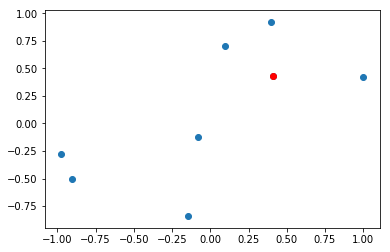

In [320]:
x_l = []
y_l = []
for pt in pts:
    x_l.append(pts[pt][0])
    y_l.append(pts[pt][1])
    
plt.scatter(x_l, y_l)
plt.scatter([pts['1'][0]], [pts['1'][1]], color = 'r')
plt.show()

In [321]:
pts.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7'])

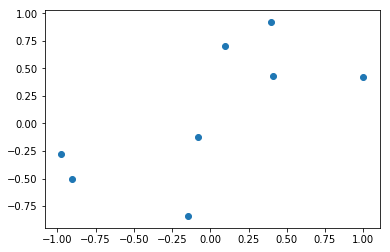

In [322]:
x_l = []
y_l = []
for pt in pts:
    x_l.append(pts[pt][0])
    y_l.append(pts[pt][1])
    
plt.scatter(x_l, y_l)
plt.show()

In [323]:
X= np.zeros((2, n))

for j in range(0, n):
        X[0, j] = pts[str(j)][0]
        X[1, j] = pts[str(j)][1]

In [324]:
np.matmul( np.transpose(X), X)

array([[ 1.07043265, -0.58575283, -0.82163255,  1.02315297,  0.55749863,
        -0.44006003,  0.13869548, -1.11709301],
       [-0.58575283,  0.35292837,  0.56024902, -0.51934215, -0.42499266,
         0.34354524, -0.08852039,  0.59114189],
       [-0.82163255,  0.56024902,  1.00851815, -0.64689748, -0.83747145,
         0.68864468, -0.1495733 ,  0.7886534 ],
       [ 1.02315297, -0.51934215, -0.64689748,  1.02868682,  0.38281727,
        -0.29206738,  0.11677249, -1.0929582 ],
       [ 0.55749863, -0.42499266, -0.83747145,  0.38281727,  0.7342595 ,
        -0.60948877,  0.11896606, -0.50723536],
       [-0.44006003,  0.34354524,  0.68864468, -0.29206738, -0.60948877,
         0.50671655, -0.09705351,  0.39536191],
       [ 0.13869548, -0.08852039, -0.1495733 ,  0.11677249,  0.11896606,
        -0.09705351,  0.02289024, -0.13689159],
       [-1.11709301,  0.59114189,  0.7886534 , -1.0929582 , -0.50723536,
         0.39536191, -0.13689159,  1.17831228]])

In [325]:
Q = np.matmul( np.transpose(X), X)

In [326]:
#now we need to define HP
HP = 0
for i in range(0, n):
    for j in range(0, n):
        HP += -1.0*Q[i,j]*sigz_dict['sigz' + str(i+1)]*sigz_dict['sigz' + str(j+1)]

In [327]:
tau = 205

In [328]:
rho0 = np.linspace(0, tau, 1000)

In [329]:
def HB_coeff(t, args):
    return 1.0 - ((1.0*t)/tau)
def HP_coeff(t, args):
    return ((1.0*t)/tau)

In [330]:
#init_state = qub_dict['q1']
#for i in range(2, n + 1):
 #   init_state = tensor(init_state, qub_dict['q' + str(i)])

In [331]:
H = [[HB, HB_coeff], [HP, HP_coeff]]

In [332]:
init_state = HB.groundstate()[1]

In [333]:
HB*init_state

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1]], shape = (256, 1), type = ket
Qobj data =
[[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]


In [334]:
init_state

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1]], shape = (256, 1), type = ket
Qobj data =
[[-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [-0.0625]
 [

In [335]:
res = mesolve(H, init_state, rho0)

In [336]:
len(res.times)

1000

In [337]:
res.times

array([  0.        ,   0.20520521,   0.41041041,   0.61561562,
         0.82082082,   1.02602603,   1.23123123,   1.43643644,
         1.64164164,   1.84684685,   2.05205205,   2.25725726,
         2.46246246,   2.66766767,   2.87287287,   3.07807808,
         3.28328328,   3.48848849,   3.69369369,   3.8988989 ,
         4.1041041 ,   4.30930931,   4.51451451,   4.71971972,
         4.92492492,   5.13013013,   5.33533534,   5.54054054,
         5.74574575,   5.95095095,   6.15615616,   6.36136136,
         6.56656657,   6.77177177,   6.97697698,   7.18218218,
         7.38738739,   7.59259259,   7.7977978 ,   8.003003  ,
         8.20820821,   8.41341341,   8.61861862,   8.82382382,
         9.02902903,   9.23423423,   9.43943944,   9.64464464,
         9.84984985,  10.05505506,  10.26026026,  10.46546547,
        10.67067067,  10.87587588,  11.08108108,  11.28628629,
        11.49149149,  11.6966967 ,  11.9019019 ,  12.10710711,
        12.31231231,  12.51751752,  12.72272272,  12.92

In [338]:
res.states[99]

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1]], shape = (256, 1), type = ket
Qobj data =
[[0.02233766+0.04430167j]
 [0.02517195+0.05034499j]
 [0.02263406+0.04494311j]
 [0.02457   +0.04901257j]
 [0.0224539 +0.04457599j]
 [0.02833353+0.05725877j]
 [0.02215832+0.04393077j]
 [0.02694622+0.05418432j]
 [0.02608873+0.05233561j]
 [0.02553051+0.0510463j ]
 [0.02727785+0.05494893j]
 [0.02571799+0.05144119j]
 [0.0226298 +0.04488735j]
 [0.02480831+0.04951375j]
 [0.02305322+0.04580854j]
 [0.02434433+0.04848834j]
 [0.02557744+0.05128219j]
 [0.02214399+0.04389862j]
 [0.02676527+0.05392514j]
 [0.02232484+0.04430616j]
 [0.0234922 +0.04672784j]
 [0.02279826+0.04527514j]
 [0.02394939+0.0477547j ]
 [0.02238503+0.04439172j]
 [0.03335313+0.06833084j]
 [0.02513935+0.05037445j]
 [0.0359831 +0.07427418j]
 [0.02615664+0.05262907j]
 [0.02650465+0.05326408j]
 [0.02232773+0.04426926j]
 [0.02788005+0.05633073j]
 [0.02263135+0.0449474j ]
 [0.02357763+0.04696959j]
 [0.03253516+0.06634216j

In [339]:
Qobj(res.states[99]).unit()

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1]], shape = (256, 1), type = ket
Qobj data =
[[0.02233766+0.04430167j]
 [0.02517195+0.05034499j]
 [0.02263406+0.04494311j]
 [0.02457   +0.04901257j]
 [0.0224539 +0.04457599j]
 [0.02833353+0.05725877j]
 [0.02215832+0.04393077j]
 [0.02694622+0.05418432j]
 [0.02608873+0.05233561j]
 [0.02553051+0.0510463j ]
 [0.02727785+0.05494893j]
 [0.02571799+0.05144119j]
 [0.0226298 +0.04488735j]
 [0.02480831+0.04951375j]
 [0.02305322+0.04580854j]
 [0.02434433+0.04848834j]
 [0.02557744+0.05128219j]
 [0.02214399+0.04389862j]
 [0.02676527+0.05392514j]
 [0.02232484+0.04430616j]
 [0.0234922 +0.04672784j]
 [0.02279826+0.04527514j]
 [0.02394939+0.0477547j ]
 [0.02238503+0.04439172j]
 [0.03335313+0.06833084j]
 [0.02513935+0.05037445j]
 [0.0359831 +0.07427418j]
 [0.02615664+0.05262907j]
 [0.02650465+0.05326408j]
 [0.02232773+0.04426926j]
 [0.02788005+0.05633073j]
 [0.02263135+0.0449474j ]
 [0.02357763+0.04696959j]
 [0.03253516+0.06634216j

In [340]:
.252*.252

0.063504

In [341]:
probs = []
for state in res.states[len(res.times)-1].unit():
    norml = Qobj(state).full()[0][0]
    print(np.absolute(norml))
    probs.append(np.absolute(norml))
    

1.2241284465256445e-09
1.963304205369259e-08
3.209375052330743e-09
2.1917666411084512e-08
1.94074041350679e-09
1.643397135361503e-05
6.39550083652815e-11
3.3461413222413853e-07
3.059953436866955e-08
1.0773579463449072e-08
1.631700563339995e-06
9.005277653255962e-08
1.8667047889095417e-09
6.6919918773233e-08
2.632298197708584e-09
9.046808645436535e-09
4.214568924861313e-08
3.941217064841539e-11
2.1051104152758327e-07
1.96108042048988e-10
8.468907101084376e-09
6.756538648768169e-09
3.585936196372422e-08
3.9392700790972966e-10
2.5659581501142217e-05
3.6094428797159154e-08
1.7323304352173106e-05
5.8113526071860404e-08
4.645185785128136e-08
5.35201069117081e-10
7.463838599906815e-06
6.690636568635571e-09
2.4029889446217584e-08
0.00017175864176929918
1.1178059028707136e-08
1.4661335669611668e-05
6.113311616627858e-06
0.00010015405733885513
3.313844950627447e-08
5.110667559885253e-05
1.0055229542904084e-09
4.56415975406842e-06
6.828033521422087e-09
1.5907759061977246e-07
2.106487907093994e-08

In [342]:
"{0:b}".format(1)

'1'

In [343]:
inp_str

[0, '1', '0', '1', '1', '0', '0', '1']

In [344]:
inp_str = "{0:b}".format(np.argmax(probs))
inp_str = list(inp_str)
inp_str
to_add = len(pts) - len(inp_str)

In [345]:
inp_str.reverse()
for i in range(0, to_add):
    inp_str.append(i)
inp_str.reverse()

In [346]:
len(pts)

8

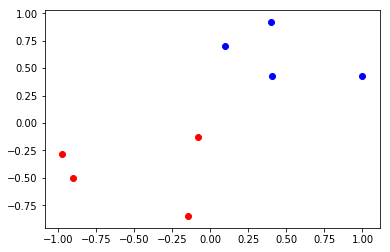

In [347]:
x_l = []
y_l = []
for j in range(0, len(pts)):
    if inp_str[j] == '1':
        plt.scatter([pts[str(j)][0]], [pts[str(j)][1]], color = 'r')
    else:
        plt.scatter([pts[str(j)][0]], [pts[str(j)][1]], color = 'b')
    

plt.show()